<a href="https://colab.research.google.com/github/Danish2op/Assignment05---Parameter-Optimization/blob/main/Assignment05_Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.stats import loguniform
import matplotlib.pyplot as plt

In [2]:
# Load faster dataset - Pen-Based Recognition (10,992 samples)
data = fetch_openml('pendigits', version=1)
X, y = data.data, data.target

In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Simplified parameter grid
param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': loguniform(1e-1, 1e2),  # Smaller range
    'gamma': loguniform(1e-4, 1e-1)  # Tighter gamma range
}


In [5]:
results = []
best_accuracy = 0
best_history = []


In [6]:
for sample in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, stratify=y, random_state=sample
    )

    # Faster search with aggressive settings
    search = RandomizedSearchCV(
        SVC(),
        param_dist,
        n_iter=30,  # Reduced iterations
        cv=3,       # Fewer folds
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train, y_train)

    # Record results
    test_acc = search.best_estimator_.score(X_test, y_test)
    results.append({
        'Sample': f'S{sample+1}',
        'Accuracy': f"{test_acc:.4f}",
        'Kernel': search.best_params_['kernel'],
        'C': f"{search.best_params_['C']:.2f}",
        'Gamma': f"{search.best_params_['gamma']:.4f}"
    })

    # Track best convergence
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_history = np.maximum.accumulate(search.cv_results_['mean_test_score'])

# Display results
results_df = pd.DataFrame(results)
print("Optimized Results:\n", results_df)


Optimized Results:
   Sample Accuracy Kernel      C   Gamma
0     S1   0.9967    rbf   5.76  0.0787
1     S2   0.9948    rbf  81.05  0.0212
2     S3   0.9955    rbf   5.76  0.0787
3     S4   0.9970    rbf   5.76  0.0787
4     S5   0.9961    rbf   5.76  0.0787
5     S6   0.9948    rbf   5.76  0.0787
6     S7   0.9970    rbf   5.76  0.0787
7     S8   0.9948    rbf   5.76  0.0787
8     S9   0.9970    rbf   5.76  0.0787
9    S10   0.9964    rbf   5.76  0.0787


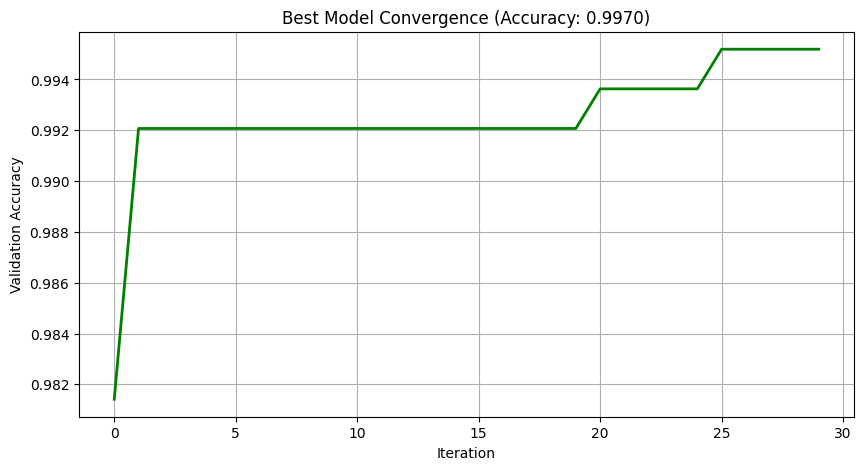

In [7]:
# Plot convergence
plt.figure(figsize=(10,5))
plt.plot(best_history, color='green', linewidth=2)
plt.title(f"Best Model Convergence (Accuracy: {best_accuracy:.4f})")
plt.xlabel("Iteration")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.savefig('convergence.png', dpi=100)
plt.show()